Visualizing a single wave file using SciPy

Importing the necessary libraries

In [1]:
#import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from pylab import*
from scipy.io import wavfile
from matplotlib.pyplot import specgram
%matplotlib inline

Reading the wave file from directory

In [2]:
sound_file_paths_relative = os.listdir("audio_train")
i = 0
sound_file_paths = []
for sound_fil in sound_file_paths_relative:
    sound_file_paths.append(os.path.join("audio_train", sound_fil))
    i = i+1
#sound_file_paths[:2]

Reading the sound file using scipy.io.wavefile class

In [3]:
#sound_files_list = os.listdir("audio_train")
sampFreq, snd = wavfile.read(sound_file_paths[0])
snd = snd / (2.**15)

Plotting the tone of the sound file using matplotlib

Text(0.5,0,'Time (ms)')

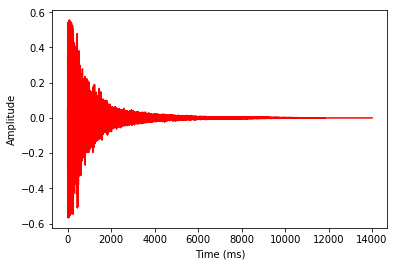

In [4]:
# Plotting the tone
timeArray = np.arange(0, 617400,1)
timeArray = timeArray/sampFreq
timeArray = timeArray * 1000 #scale to milli seconds

#plotting the tone
plot(timeArray, snd, color = 'r')
ylabel('Amplitude')
xlabel('Time (ms)')

Plotting the frequency of the sound using matplotlib
Used fft algorithm to convert time to frequency
Referred the following link: http://samcarcagno.altervista.org/blog/basic-sound-processing-python/?doing_wp_cron=1529433045.4720048904418945312500

Text(0,0.5,'Power (dB)')

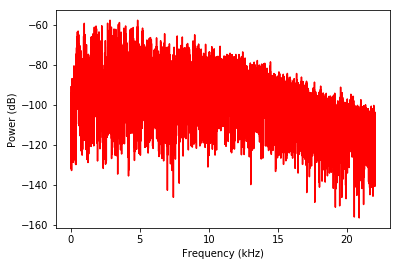

In [16]:
# Plotting the frequency content
n = len(snd)
p = fft(snd) #takes the fast fourier transform
nUniquePts = int(ceil((n+1)/2.0))
p = p[0:nUniquePts]
p = abs(p)

p = p / float(n) # scale by the number of points so that
                 # the magnitude does not depend on the length 
                 # of the signal or on its sampling frequency  
p = p**2  # square it to get the power 

# multiply by two
# odd nfft excludes Nyquist point
if n % 2 > 0: # we've got odd number of points fft
    p[1:len(p)] = p[1:len(p)] * 2
else:
    p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / n);
plot(freqArray/1000, 10*log10(p), color='r')
xlabel('Frequency (kHz)')
ylabel('Power (dB)')